In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('AmesHousing.csv')

In [ ]:
# Data Exploration
print(df.shape)
print(df.columns)
df.head()
df.info()
df.describe()
df.isna().sum()

(2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr B

,0
Order,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,490
...,...
Mo Sold,0
Yr Sold,0
Sale Type,0
Sale Condition,0


In [ ]:
# Feature Selection & Train-Test Split
feature_cols = [
    'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF',
    'Full Bath', 'Year Built', 'Lot Area'
]
target_col = 'SalePrice'

X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (2344, 7) (2344,)
Test set shape: (586, 7) (586,)


In [ ]:
# Data Wrangling & EDA - Part 1
import matplotlib.pyplot as plt
import seaborn as sns

train_df = X_train.copy()
train_df['SalePrice'] = y_train

num_cols = train_df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    train_df[col].fillna(train_df[col].median(), inplace=True)

<ipython-input-4-89fc246f8c6b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)


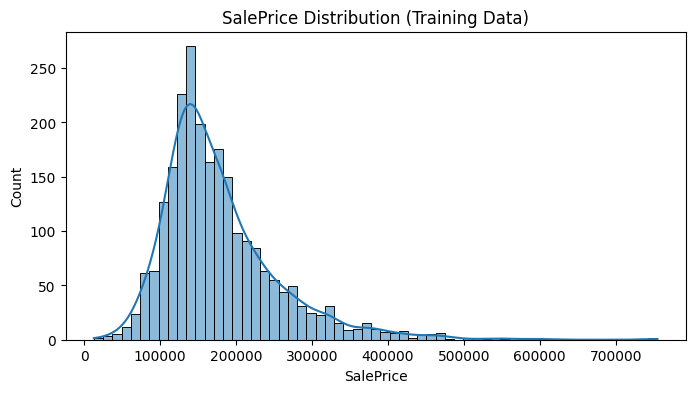

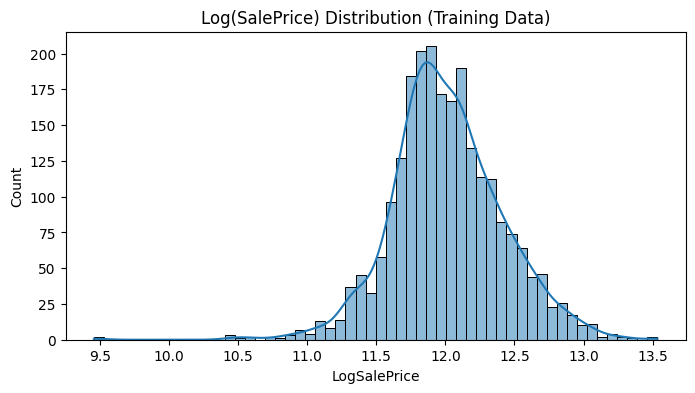

In [ ]:
# Data Wrangling & EDA - Part 2
train_df['LogSalePrice'] = np.log(train_df['SalePrice'] + 1)

plt.figure(figsize=(8, 4))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("SalePrice Distribution (Training Data)")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(train_df['LogSalePrice'], kde=True)
plt.title("Log(SalePrice) Distribution (Training Data)")
plt.show()


Correlation of features with SalePrice:
SalePrice        1.000000
LogSalePrice     0.944840
Overall Qual     0.795298
Gr Liv Area      0.698315
Garage Cars      0.644218
Total Bsmt SF    0.612110
Year Built       0.545409
Full Bath        0.542053
Lot Area         0.261336
Name: SalePrice, dtype: float64


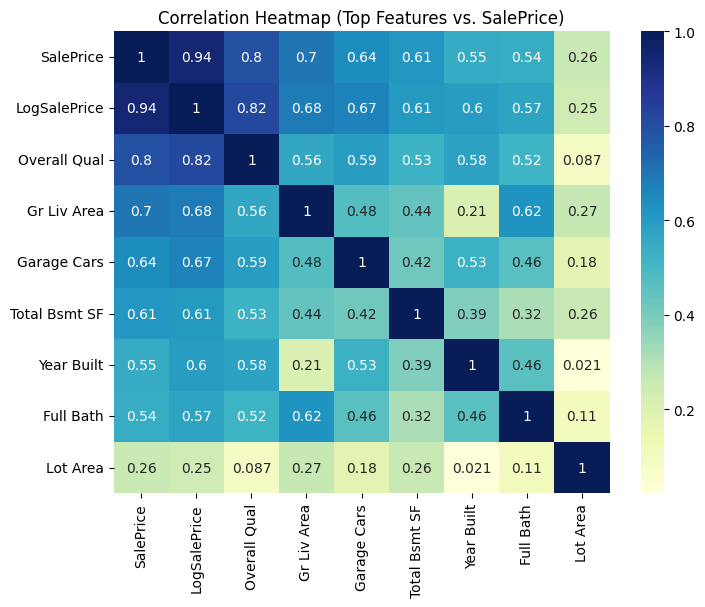

In [ ]:
# Correlation Analysis
corr_matrix = train_df.corr(numeric_only=True)
print("\nCorrelation of features with SalePrice:")
print(corr_matrix['SalePrice'].sort_values(ascending=False).head(10))

top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False).head(10).index
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[top_features].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap (Top Features vs. SalePrice)")
plt.show()

In [ ]:
# Final Data Preparation
X_train_final = train_df.drop(['SalePrice', 'LogSalePrice'], axis=1)
y_train_final = train_df['LogSalePrice']

test_df = X_test.copy()
test_df['SalePrice'] = y_test

for col in num_cols:
    if col in test_df.columns:
        test_df[col].fillna(train_df[col].median(), inplace=True)

test_df['LogSalePrice'] = np.log(test_df['SalePrice'] + 1)
X_test_final = test_df.drop(['SalePrice', 'LogSalePrice'], axis=1, errors='ignore')
y_test_final = test_df['LogSalePrice']

<ipython-input-7-c69a36dc729b>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(train_df[col].median(), inplace=True)


In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(X_train_final, y_train_final)

y_pred_log = sk_model.predict(X_test_final)
y_pred = np.exp(y_pred_log) - 1
y_true = np.exp(y_test_final) - 1

rmse_sklearn = np.sqrt(np.mean((y_pred - y_true)**2))
print("Test RMSE (scikit-learn, original scale):", rmse_sklearn)
print("Intercept (log scale):", sk_model.intercept_)
print("Coefficients (log scale):", sk_model.coef_)

Test RMSE (scikit-learn, original scale): 41826.601002979005
Intercept (log scale): 5.5872717199288395
Coefficients (log scale): [ 1.16903904e-01  2.32002022e-04  6.76942312e-02  1.09116868e-04
 -9.04142536e-03  2.59446129e-03  3.79240447e-06]


In [ ]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

y_pred_log = sk_model.predict(X_test_final)
y_test_log = y_test_final.values
y_pred_original = np.exp(y_pred_log) - 1
y_test_original = np.exp(y_test_log) - 1

rmse_val = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae_val = mean_absolute_error(y_test_original, y_pred_original)
r2_val = r2_score(y_test_original, y_pred_original)
mape_val = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original)) * 100

print("Test RMSE:", rmse_val)
print("Test MAE: ", mae_val)
print("Test R²:  ", r2_val)
print("Test MAPE:", mape_val, "%")

Test RMSE: 41826.601002979005
Test MAE:  21351.08376095425
Test R²:   0.7817955606204494
Test MAPE: 11.698564511187111 %


In [ ]:
# Cross-Validation
cv_model = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(cv_model, X_train_final, y_train_final,
                        scoring='neg_mean_squared_error',
                        cv=kfold)
rmse_scores = np.sqrt(-scores)
print("\nCross-Validation RMSE scores:", rmse_scores)
print("Mean CV RMSE:", rmse_scores.mean(), "Std. Dev:", rmse_scores.std())


Cross-Validation RMSE scores: [0.1402396  0.15979772 0.16085005 0.15337653 0.25310686]
Mean CV RMSE: 0.17347415187932852 Std. Dev: 0.04048760549856509


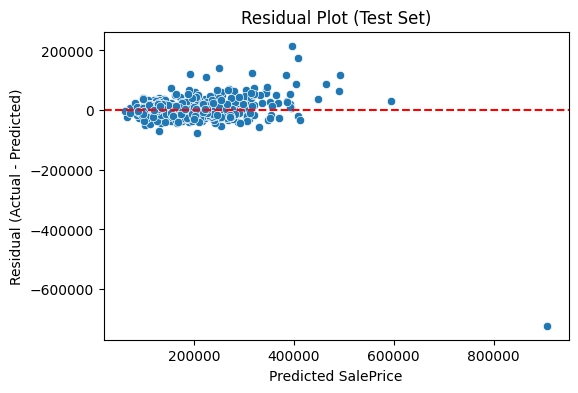

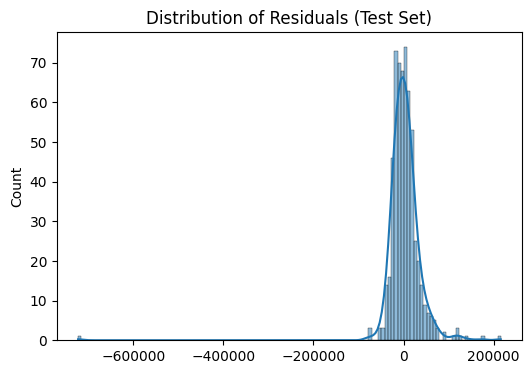

In [ ]:
# Residual Analysis
residuals = y_test_original - y_pred_original

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_original, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot (Test Set)")
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals (Test Set)")
plt.show()

Intercept (log scale): 5.5872717199288395 

Coefficients (log scale) and approximate % price change:

Overall Qual: coefficient = 0.1169, ~12.40% change per unit
Gr Liv Area: coefficient = 0.0002, ~0.02% change per unit
Garage Cars: coefficient = 0.0677, ~7.00% change per unit
Total Bsmt SF: coefficient = 0.0001, ~0.01% change per unit
Full Bath: coefficient = -0.0090, ~-0.90% change per unit
Year Built: coefficient = 0.0026, ~0.26% change per unit
Lot Area: coefficient = 0.0000, ~0.00% change per unit


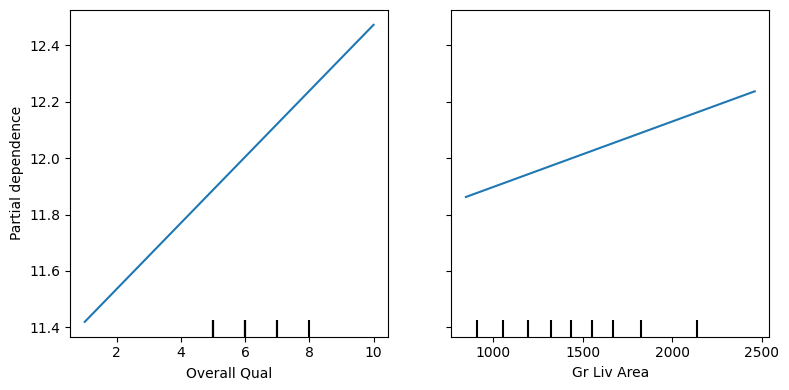

In [ ]:
# Model Interpretation
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

feature_names = X_train_final.columns
coefs = sk_model.coef_

print("Intercept (log scale):", sk_model.intercept_, "\n")
print("Coefficients (log scale) and approximate % price change:\n")

for fn, c in zip(feature_names, coefs):
    pct_change = (np.exp(c) - 1) * 100
    print(f"{fn}: coefficient = {c:.4f}, ~{pct_change:.2f}% change per unit")

features_to_plot = [0, 1]
fig, ax = plt.subplots(figsize=(8, 4))
PartialDependenceDisplay.from_estimator(
    estimator=sk_model,
    X=X_train_final,
    features=features_to_plot,
    feature_names=feature_names,
    ax=ax
)
plt.tight_layout()
plt.show()

In [ ]:
# Ridge Regression Setup
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from math import sqrt

X_train_refined = X_train_final.copy()
y_train_refined = y_train_final.copy()
X_test_refined = X_test_final.copy()
y_test_refined = y_test_final.copy()

if 'Gr Liv Area' in X_train_refined.columns and 'Total Bsmt SF' in X_train_refined.columns:
    X_train_refined['TotalArea'] = X_train_refined['Gr Liv Area'] + X_train_refined['Total Bsmt SF']
    X_test_refined['TotalArea'] = X_test_refined['Gr Liv Area'] + X_test_refined['Total Bsmt SF']

if 'Lot Area' in X_train_refined.columns:
    X_train_refined['LogLotArea'] = np.log(X_train_refined['Lot Area'] + 1)
    X_test_refined['LogLotArea'] = np.log(X_test_refined['Lot Area'] + 1)
    X_train_refined.drop(['Lot Area'], axis=1, inplace=True)
    X_test_refined.drop(['Lot Area'], axis=1, inplace=True)

In [ ]:
# Ridge Model Pipeline
cat_features = []
if 'Neighborhood' in X_train_refined.columns:
    cat_features.append('Neighborhood')

num_features = X_train_refined.select_dtypes(include=[np.number]).columns.tolist()
num_features = [col for col in num_features if col not in cat_features]

num_transformer = Pipeline([('scaler', StandardScaler())])
cat_transformer = Pipeline([('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

ridge_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', Ridge())
])

In [ ]:
# Ridge Model Training
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 50, 100]
}

ridge_search = GridSearchCV(
    estimator=ridge_pipe,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

ridge_search.fit(X_train_refined, y_train_refined)

print("Best alpha:", ridge_search.best_params_)
print("Best CV score (negative MSE):", ridge_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best alpha: {'regressor__alpha': 10}
Best CV score (negative MSE): -0.028833277047160606


In [ ]:
# Ridge Model Evaluation
best_model = ridge_search.best_estimator_
y_pred_test_log = best_model.predict(X_test_refined)
y_pred_test_original = np.exp(y_pred_test_log) - 1
y_test_original = np.exp(y_test_refined) - 1

rmse_test = sqrt(mean_squared_error(y_test_original, y_pred_test_original))
print("Test RMSE (Ridge, alpha=", ridge_search.best_params_['regressor__alpha'], "):", rmse_test)

Test RMSE (Ridge, alpha= 10 ): 40442.57707895048


In [ ]:
# Lasso Model Setup & Training
from sklearn.linear_model import Lasso

lasso_pipe = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', Lasso(max_iter=10000))
])

param_grid_lasso = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

lasso_search = GridSearchCV(
    estimator=lasso_pipe,
    param_grid=param_grid_lasso,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

lasso_search.fit(X_train_refined, y_train_refined)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Overall '
                                                                          'Qual',
                                                                          'Gr '
                                                                          'Liv '
                                                                          'Area',
                                                                          'Garage '
                                                                          'Cars',
                                                                          'Total '
                                                                          'Bsmt '
                                                                          'SF',
                                                                          'Full '
                                                                          'Bath',
                                                                          'Year '
                                                                          'Built',
                                                                          'TotalArea',
                                                                          'LogLotArea']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('regressor', Lasso(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Lasso Model Evaluation
print("Best alpha:", lasso_search.best_params_)
print("Best CV score (negative MSE):", lasso_search.best_score_)

best_lasso_model = lasso_search.best_estimator_
y_pred_test_log = best_lasso_model.predict(X_test_refined)
y_pred_test_original = np.exp(y_pred_test_log) - 1
y_test_original = np.exp(y_test_refined) - 1

rmse_test_lasso = sqrt(mean_squared_error(y_test_original, y_pred_test_original))
print("\nTest RMSE (Lasso):", rmse_test_lasso)

Best alpha: {'regressor__alpha': 0.001}
Best CV score (negative MSE): -0.028823530471828694

Test RMSE (Lasso): 40352.914286618725


In [ ]:
# Feature Analysis
ohe = best_lasso_model.named_steps['preprocess'].transformers_[1][1].named_steps['onehot']
cat_feature_names = ohe.get_feature_names_out([cat_features[0]]) if cat_features else []
all_transformed_features = num_features + list(cat_feature_names)

coeffs = best_lasso_model.named_steps['regressor'].coef_

print("\nNumber of features in final model:", len(coeffs))
print("Coefficients:")
for f, c in zip(all_transformed_features, coeffs):
    print(f"{f}: {c:.4f}")

zero_coeff_features = [f for f, c in zip(all_transformed_features, coeffs) if abs(c) < 1e-4]
print("\nFeatures driven to zero by Lasso:", zero_coeff_features)


Number of features in final model: 8
Coefficients:
Overall Qual: 0.1697
Gr Liv Area: 0.0584
Garage Cars: 0.0415
Total Bsmt SF: 0.0000
Full Bath: -0.0000
Year Built: 0.0810
TotalArea: 0.0724
LogLotArea: 0.0555

Features driven to zero by Lasso: ['Total Bsmt SF', 'Full Bath']


In [ ]:
# Best Model (Lasso)
import pickle
from google.colab import files

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_lasso_model, file)

files.download('best_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>